# **Assignment**:
Plot a distribution plot of the chromosome lengths of FUS gene from Homo sapiens K562 (https://www.encodeproject.org/files/ENCFF861KMV/) from its BED file.
Download the BED file, unzip it, create a dictionary from the names of the chromosomes and the corresponding intervals. Create a dataframe and subsequently plot a violinplot with lengths distribution.

# **Distribution of chromosome lengths - step by step**.

I.	Distribution plot of chromosome lengths


A.	Get the BED file

In [0]:
# Send commands to system (linux)
# Download from URL with wget
! wget https://www.encodeproject.org/files/ENCFF861KMV/@@download/ENCFF861KMV.bed.gz
# Gunzip to uncompress the archive
! gunzip ENCFF861KMV.bed.gz

--2020-02-28 13:06:18--  https://www.encodeproject.org/files/ENCFF861KMV/@@download/ENCFF861KMV.bed.gz
Resolving www.encodeproject.org (www.encodeproject.org)... 34.211.244.144
Connecting to www.encodeproject.org (www.encodeproject.org)|34.211.244.144|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://encode-public.s3.amazonaws.com/2018/12/03/176f56a4-0aab-4401-957b-ba80624d58dc/ENCFF861KMV.bed.gz?response-content-disposition=attachment%3B%20filename%3DENCFF861KMV.bed.gz&Signature=vUDuLKDkdMry8fBBGr%2BYCf%2FJlqk%3D&x-amz-security-token=IQoJb3JpZ2luX2VjEA0aCXVzLXdlc3QtMiJIMEYCIQDi%2BcIjqD6%2B0f2SKkw3I1cPRp39dukv%2FqQvKdkLXnvl1QIhAJcymMbJ7VTl0beM%2F0VLe6zCWU8ILKgApcHVXUVz%2BR3WKr0DCNb%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEQABoMMjIwNzQ4NzE0ODYzIgw6QP15eXgt%2FyrhkOAqkQOCLkSo4WPYa%2B3WkTnvKoP%2Bpqq2FnzVv9m0L8TVfZegfQAYybWJVPmavIee50Ly0K4cwSh7cyXck9p6YYvVkD99gKtzKhzu3veKFDI6hs5SC3IAXBWdp%2B%2B%2BlrAyT%2FUi7gWZ9CriD8qGUUgqyN1uaIH9%2F5b7Wp6zMd%2Bhqpojr

Var. I.: Distribution Plot The Hard Way

In [0]:
# Unzipped input BED file
input_file = "ENCFF861KMV.bed"

B.	Define the compounds of the dictionary

In [0]:
# Empty dictionary which is going to be filled with BED file data.
dict_dist = {}

# Open the BED file, read it, separate its lines into columns behind the tab delimeter.
# Define the chromosome name, start, end, and interval columns.
with open(input_file, "r") as text:
  for line in text.readlines():
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    interval = end - start

    # If the chromosome name is already in the dictionary, add the interval inside - this 
    # way you avoid duplitious chromosome names.
    if chrom_name in dict_dist:
      dict_dist[chrom_name].append(interval)

    else:
      # Define the structure of the empty dictionary first. If the chromosome name 
      # is not yet in the dictionary, it is going to be created in this step.
      # Subsequently, the corresponding intervals are going to be added inside
      # the chromosome name.
      dict_dist[chrom_name] = [] 
      dict_dist[chrom_name].append(interval) 
      # Note: dict_dist = {chrom_name[interval:count]} - the occurrence of the intervals 
      # is counted automatically


C. Print out

In [0]:
print(dict_dist) # Print out key value pairs of chromosomes with corrresponding intervals.

# If you want to print separately all of the chromosomes with their intervals,
# uncomment the following 3 lines.
# for chrom_name in dict_dist: # Iterate over the list in the dictionary.
  # print(chrom_name) # Print out the individual chromosomes.
  # print(dict_dist[chrom_name]) # Print out the list of intervals.

{'chr9': [184, 47, 187, 121, 58, 53, 104, 71, 73, 105, 72, 100, 136, 72, 103, 108, 80, 89, 139, 72, 176, 92, 115, 109, 130, 113, 85, 67, 53, 107, 138, 129, 104, 65, 112, 87, 89, 120, 91, 52, 47, 96, 72, 48, 74, 82, 150, 100, 103, 56, 101, 117, 120, 216, 54, 100, 76, 98, 111, 153, 73, 122, 82, 103, 176, 69, 123, 71, 78, 105, 82, 112, 96, 105, 183, 61, 84, 137, 60, 104, 86, 74, 237, 72, 168, 113, 110, 82, 77, 90, 96, 89, 25, 174, 122, 63, 129, 127, 103, 47, 159, 70, 124, 93, 151, 77, 186, 165, 74, 42, 155, 81, 52, 79, 50, 66, 95, 109, 63, 76, 108, 94, 136, 112, 106, 84, 108, 57, 148, 96, 70, 87, 105, 66, 86, 170, 74, 121, 105, 79, 82, 55, 73, 110, 68, 138, 128, 85, 135, 64, 101, 83, 91, 236, 121, 70, 106, 100, 113], 'chr3': [100, 73, 78, 61, 29, 15, 97, 58, 60, 80, 31, 38, 52, 133, 74, 57, 50, 53, 103, 65, 111, 85, 122, 62, 117, 133, 124, 186, 103, 81, 63, 93, 141, 167, 61, 109, 107, 64, 75, 94, 81, 44, 42, 103, 64, 175, 70, 102, 81, 90, 136, 77, 70, 76, 102, 83, 54, 70, 205, 59, 35, 88,

D. Distribution plot.

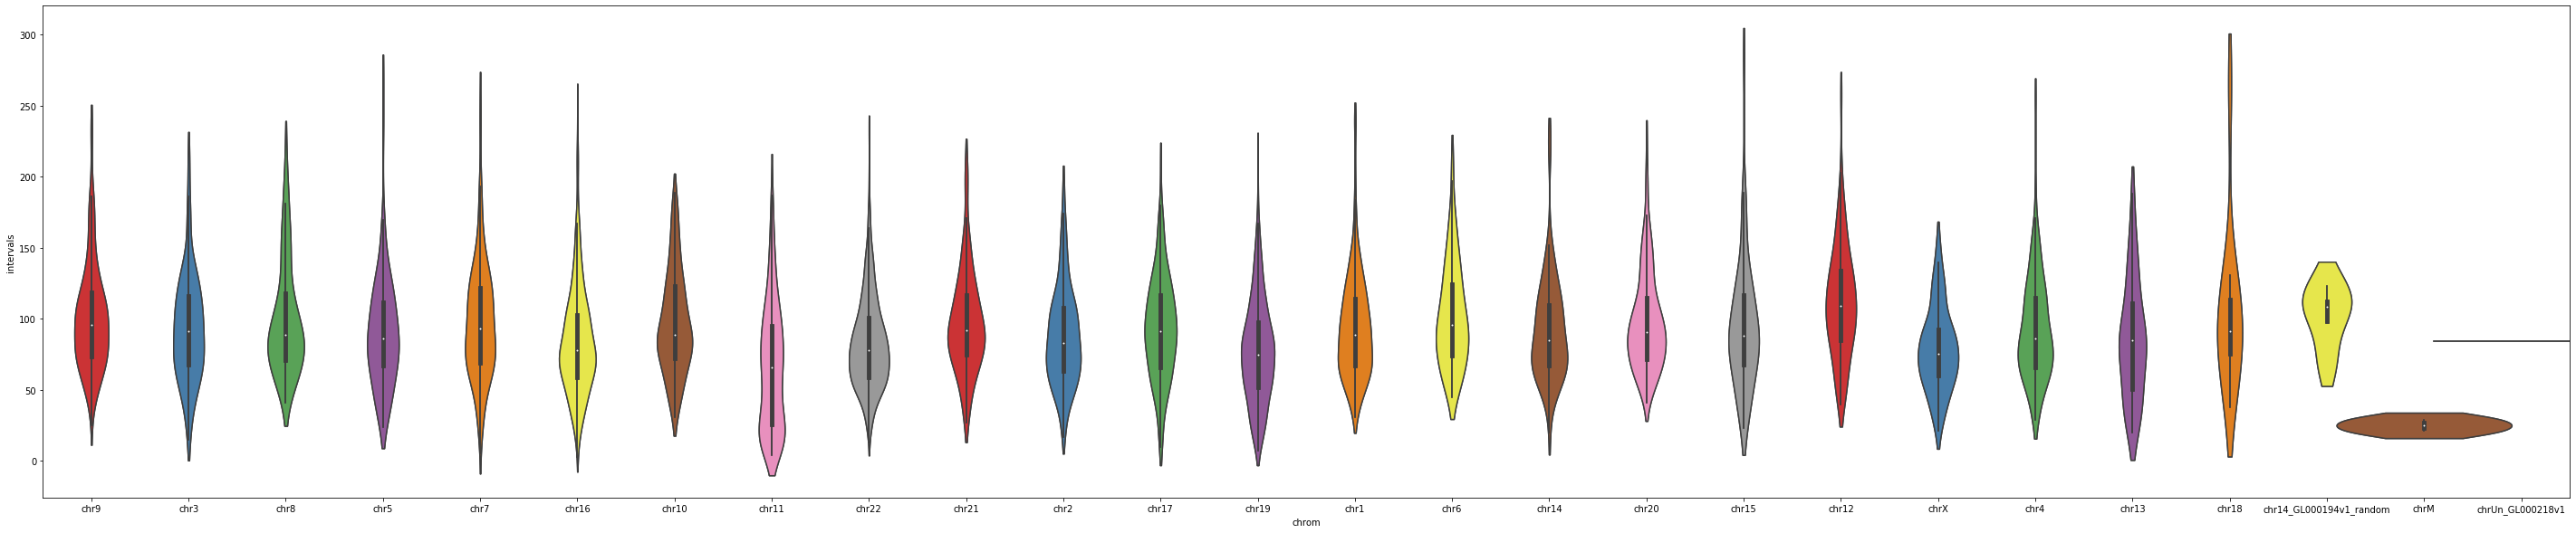

In [0]:
# Plot a violin plot to visualize the distribution of the chromosomes' intervals.
# To plot a scatter graph for the dictionary you need to import matplotlib, pandas,
# seaborn, savefig, and show.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import savefig
from matplotlib.pyplot import show
plt.figure(figsize=(50,10))

# First, you need to create an empty list where you save the daraframe later.
df_list = []

for chrom_name, value in dict_dist.items():
  # Second, you need to create a pandas Series where you are going to store the 
  # values from the dictionary.
  df_series = pd.Series(value)
  # Third, you need to create dataframe from this Series where the column stores "intervals".
  df = pd.DataFrame(df_series, columns=["intervals"])
  # Fourth, the column "chrom" is going to be created from chrom_name.
  df["chrom"] = chrom_name
  # Fifth, you append each new dataframe to the gradually filled list.
  df_list.append(df)
  # Concatenate pandas objects along x axis and finally, the dataframe is being 
  # created via concatenation of the five lists.
  final_df = pd.concat(df_list, axis=0)

# Cut determines the range of y axis.
sns.violinplot(x="chrom", y="intervals", data=final_df, cut=1, palette="Set1", width=1.8)
# Assign a variable to the plot, save the figure as jpg file.
violinplotII = sns.violinplot(x="chrom", y="intervals", data=final_df, cut=1, palette="Set1",
                            width=1.8)
violinplotII.figure.savefig("violinplotII.jpg")
# Display the saved plot.
show("violinplotII.jpg")

Var. II: Distribution Plot the Simple Way:


Plot created straight from a dataframe which originated from unzipped BED file. 

You can use different types of plots although in your case violin plot is optimal. 

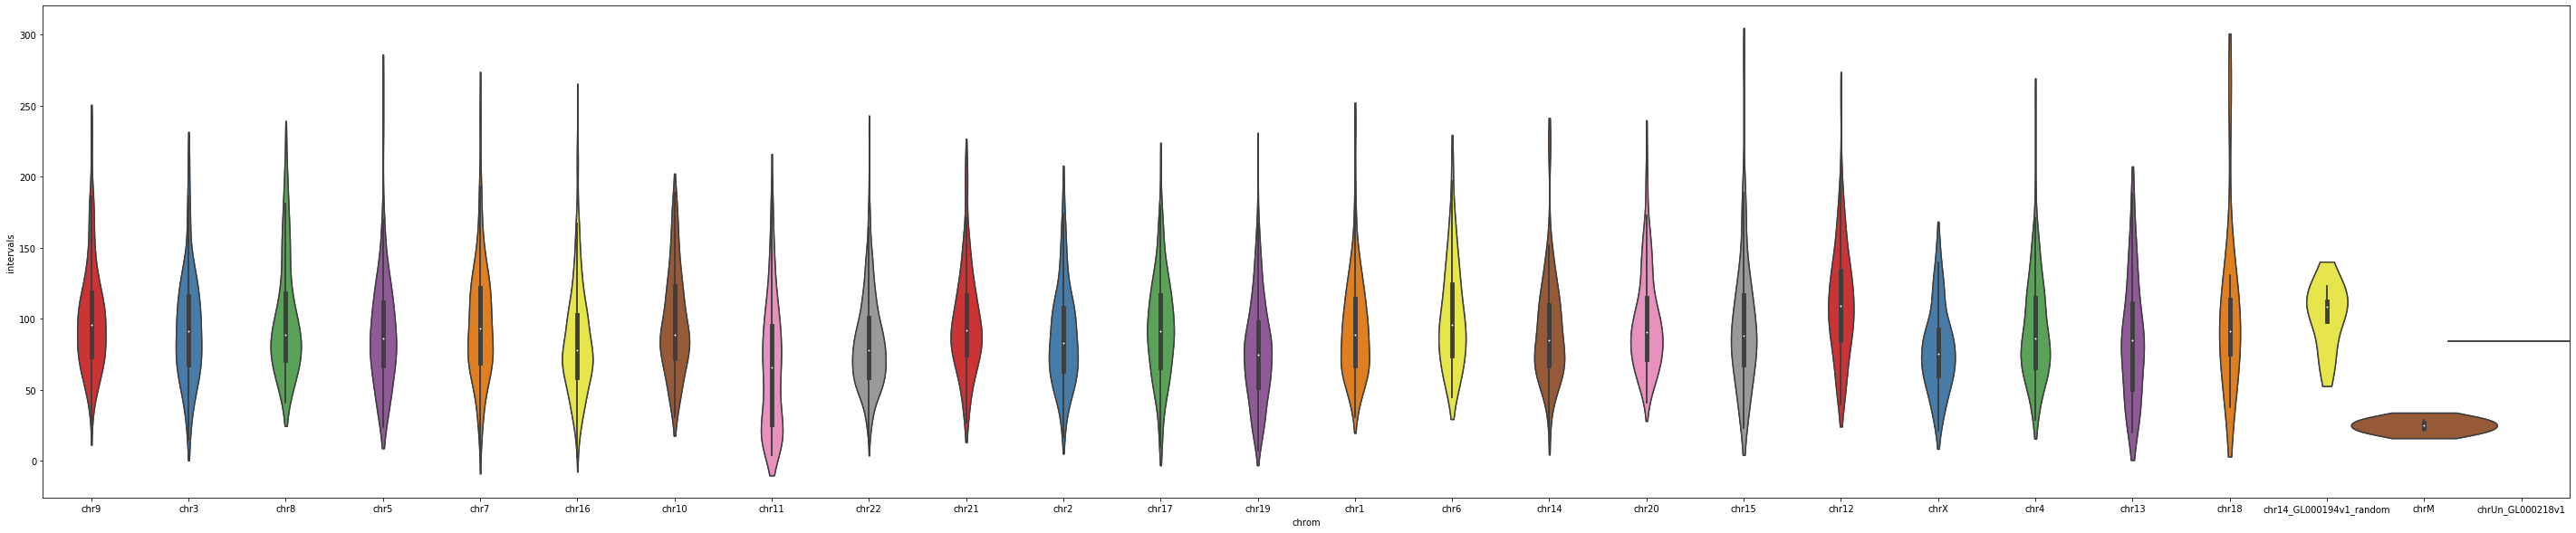

In [0]:
# Violin plot
input_file = "ENCFF861KMV.bed"
from matplotlib.pyplot import show
from pylab import savefig
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))

# Load BED file seperated by tab delimeter as Pandas df and save it to bed_df variable. 
# Provide name for each of the columns - for your purposes the most important are 
# "chrom", "start", and "end".
bed_df = pd.read_csv(input_file, sep="\t", names=["chrom", "start", "end", "name", 
                                                  "score", "strand", "7", "8", "9", "10"])

# You need to define intervals inside the variable bed_df in the next step. 
bed_df["intervals"] = bed_df.end - bed_df.start

# Create the violin plot with the chromosome intervals distribution.
sns.violinplot(x="chrom", y="intervals", data=bed_df, cut = 1, width = 1.5, 
               palette="Set1")

# To save the plot, you need to assign it to a variable. 
violinplotIII = sns.violinplot(x="chrom", y="intervals", data=bed_df, cut = 1, width = 1.5, 
                        palette="Set1")
violinplotIII.figure.savefig("violinplotIII.jpg")

# If you need to display the saved plot, use the function show.
show("violinplotIII.jpg")

# **Compressed code for the chromosome lengths distribution plot.**

      chrom      start        end          name  ...          8  9  10  intervals
0      chr9  137102003  137102187  FUS_K562_IDR  ...   6.780835 -1  -1        184
1      chr3  128492692  128492792  FUS_K562_IDR  ...  10.294455 -1  -1        100
2      chr8  143593204  143593275  FUS_K562_IDR  ...   6.009706 -1  -1         71
3      chr9  136667873  136667920  FUS_K562_IDR  ...   5.213689 -1  -1         47
4      chr5   34193109   34193176  FUS_K562_IDR  ...   9.125831 -1  -1         67
...     ...        ...        ...           ...  ...        ... ..  ..        ...
4468   chr2   10188344   10188413  FUS_K562_IDR  ...   4.400442 -1  -1         69
4469   chr7    6702175    6702320  FUS_K562_IDR  ...  11.307670 -1  -1        145
4470  chr19    1416973    1417056  FUS_K562_IDR  ...  10.283976 -1  -1         83
4471  chr16   70437155   70437257  FUS_K562_IDR  ...   3.590813 -1  -1        102
4472  chr11   62714025   62714139  FUS_K562_IDR  ...   5.608732 -1  -1        114

[4473 rows x 11

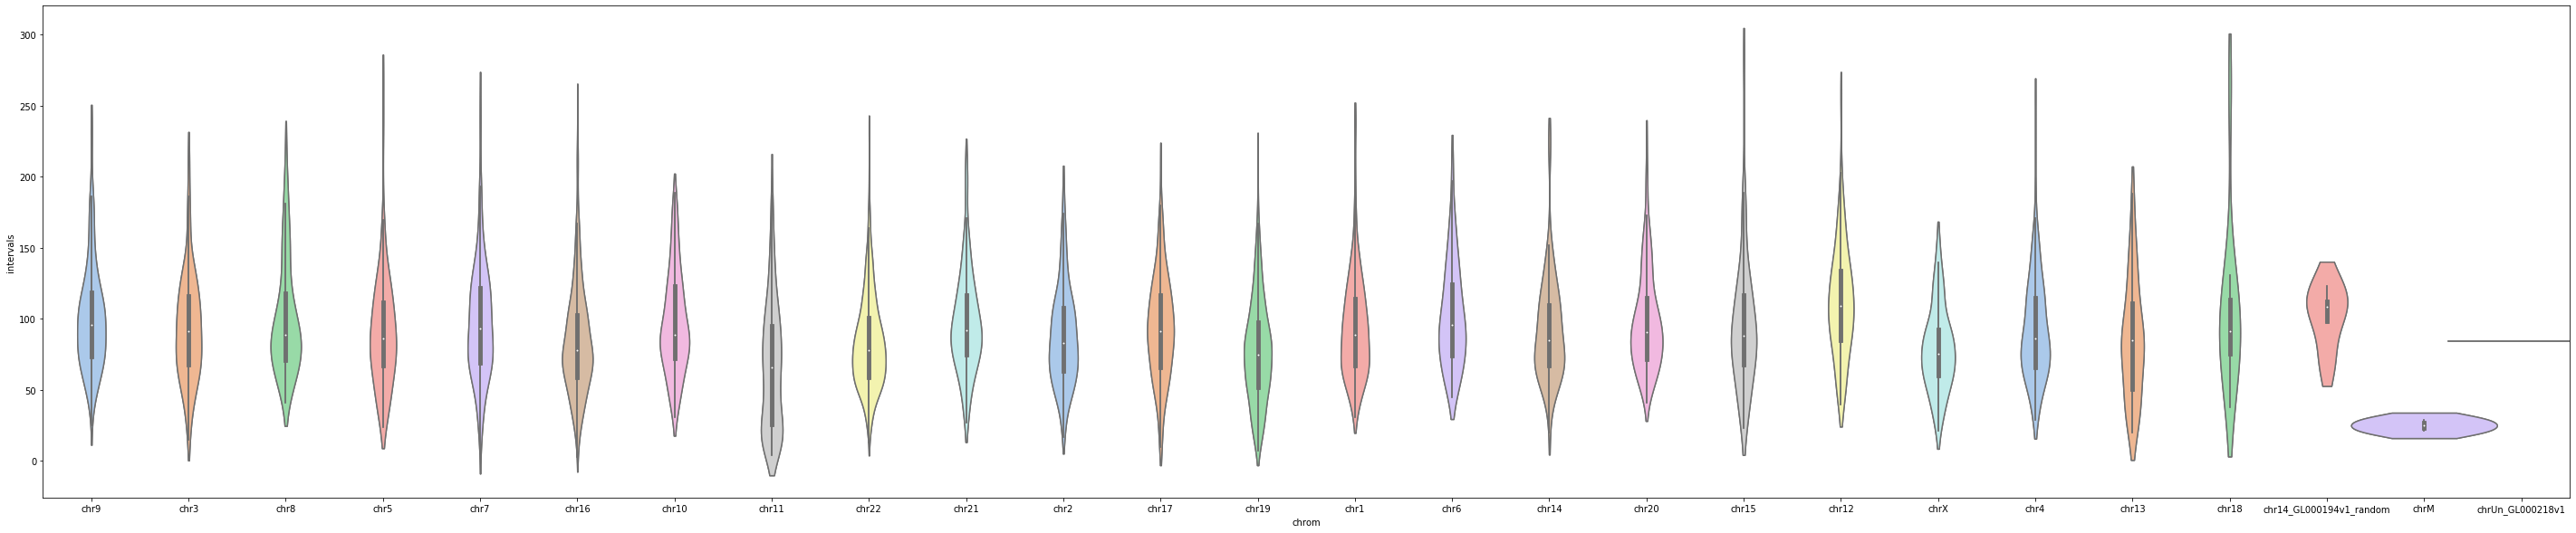

In [0]:
# Do not forget to import corresponding packages you are going to need in each step of the data 
# preparation.
import pandas as pd

# The dataframe is created from csv file which you are reading with pandas tool. 
# You need to unzip the source BED file, separate the chromosomes from one another using tab 
# delimiter as separator, and name the ten columns of the chromosomes.
dataframe = pd.read_csv("https://www.encodeproject.org/files/ENCFF861KMV/"
"@@download/ENCFF861KMV.bed.gz", compression="gzip", sep="\t", 
                        names=["chrom", "start", "end", "name", "score", "strand", "7", "8", "9", "10"])

# It is necessary need to define the intervals by subtracting the start from the 
# end in the dataframe.
dataframe["intervals"] = dataframe.end - dataframe.start
print(dataframe)

import matplotlib.pyplot as plt
import seaborn as sns

# Here you can set the size of the graph.
plt.figure(figsize=(50,10))

# Now you have the dataframe with separated chromosomes and their intervals which are required for 
# plotting the graph prepared.
# The x axis is going to be the name of the chromosome, the y axis is going to be the interval of 
# the respective chromosomes. Data is the dataframe you prepared, cut is changing the range of the 
# y axis, width is changing the width of the particular violin plots.
# Palette enables you to change the color of the graph.
sns.violinplot(x="chrom", y="intervals", data=dataframe, cut = 1, width = 1.5, palette="pastel")

from pylab import savefig
from matplotlib.pyplot import show

# To save the plot, you need to create a variable, save this variable as a jpg file, and to visualize 
# it again, use function show and the jpg file.
violinplotI = sns.violinplot(x="chrom", y="intervals", data=dataframe, cut = 1, 
                        width = 1.5, palette="pastel")
violinplotI.figure.savefig("violinplotI.jpg")
show("violinplotI.jpg")